In [132]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy as sc

In [133]:
sklearn.__version__

'0.23.1'

## Création de nos datas 

In [134]:
rc_X,rc_y= make_classification(n_samples=1000, n_features=6, n_classes=2, weights=[0.10,0.90])

In [135]:
rc=pd.DataFrame(data=rc_X)

In [136]:
rc['target']=rc_y
rc

,0,1,2,3,4,5,target
0,-2.687457,0.212161,1.291510,-0.570735,-0.034811,-1.752367,1
1,-0.856284,-0.271061,0.846765,-0.661310,-1.157881,-0.097640,1
2,1.369774,-0.331816,-0.081066,-0.344922,-1.624902,1.504112,1
3,-1.354196,1.757547,1.057429,-0.735528,0.781041,-0.452596,1
4,0.077148,-0.589943,0.385736,-0.449363,0.630217,0.497831,1
...,...,...,...,...,...,...,...
995,-1.572471,0.663691,0.977190,-0.577947,-0.637943,-0.790880,1
996,-0.825624,0.338831,1.667111,-1.574680,-0.794575,0.806246,1
997,-0.107428,0.236589,1.112579,-1.191506,1.556533,1.052921,1
998,-0.751445,-0.659662,0.715667,-0.550133,-1.535033,-0.114713,1


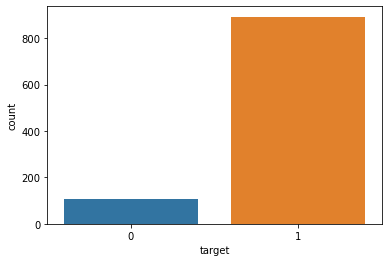

In [137]:
sns.countplot(rc.target)

<b>Nos données sont donc bien désiquilibrée</b>

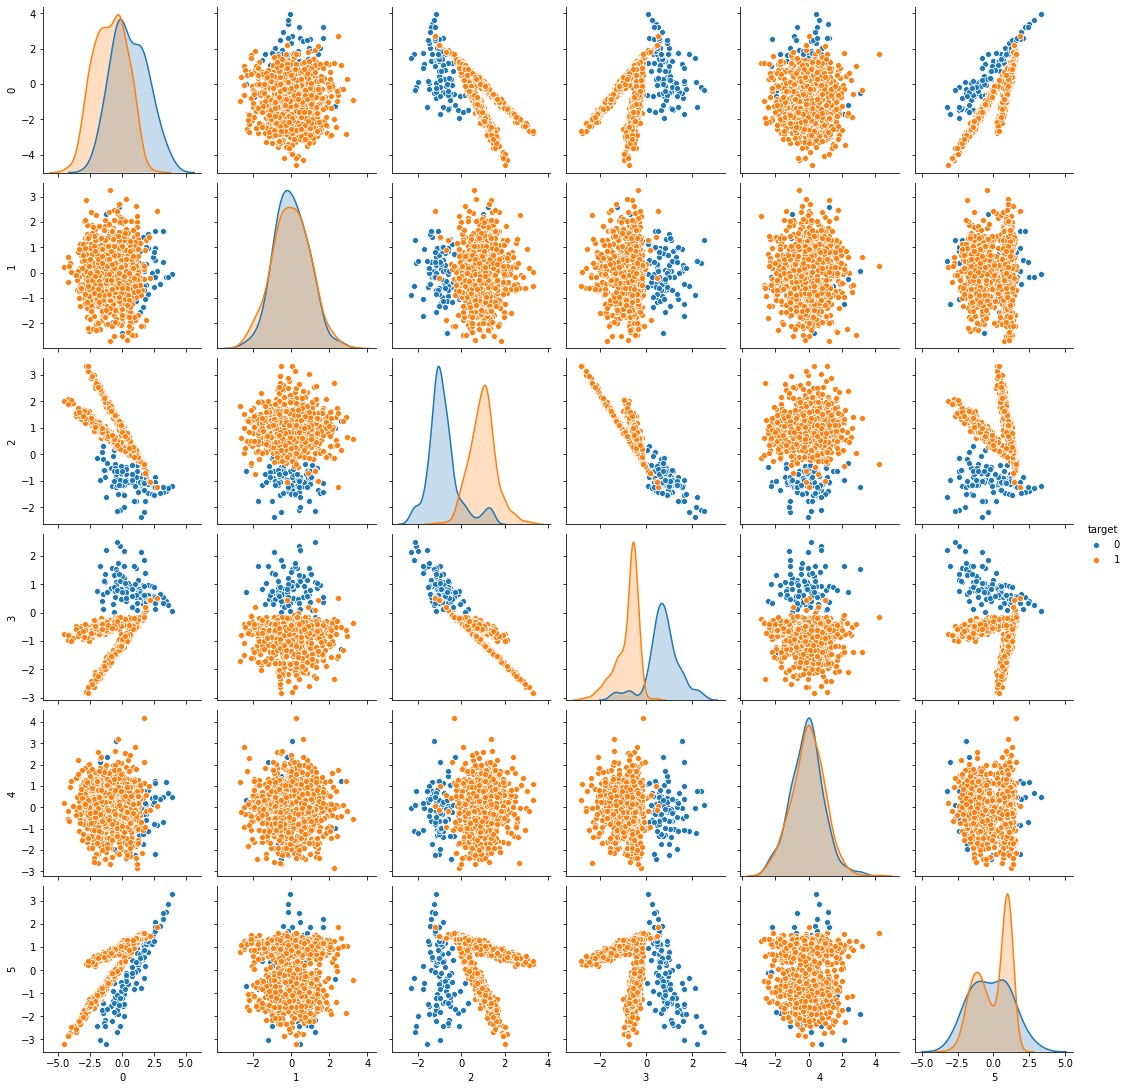

In [139]:
sns.pairplot(rc, hue='target')

## Resample (Augmenter)

In [156]:
from imblearn.over_sampling import SMOTE
X=rc.iloc[:,0:5]
y=rc.iloc[:,6]

In [160]:
smote = SMOTE('minority')
X_aug,y_sm = smote.fit_sample(X, y)

X_aug['target']=y_sm

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [161]:
X_aug

,0,1,2,3,4,target
0,-2.687457,0.212161,1.291510,-0.570735,-0.034811,1
1,-0.856284,-0.271061,0.846765,-0.661310,-1.157881,1
2,1.369774,-0.331816,-0.081066,-0.344922,-1.624902,1
3,-1.354196,1.757547,1.057429,-0.735528,0.781041,1
4,0.077148,-0.589943,0.385736,-0.449363,0.630217,1
...,...,...,...,...,...,...
1779,0.678046,-0.230575,-0.989371,0.874899,-0.975651,0
1780,0.508373,0.052972,-0.957429,0.893500,-0.421450,0
1781,-0.381577,0.913207,-1.135520,1.371791,-0.024156,0
1782,-0.823957,0.671206,-0.687210,1.018191,-0.422214,0


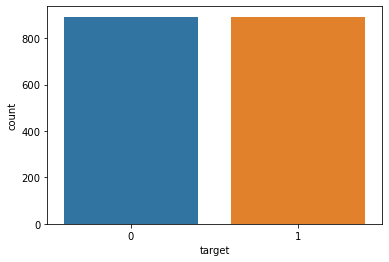

In [163]:
sns.countplot(X_aug.target)

## Resample (Réduction)

In [164]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_reduce, y_rus = rus.fit_sample(X, y)

X_reduce['target']=y_rus

In [158]:
X_reduce

,0,1,2,3,4,target
0,0.055679,-0.910286,-0.638971,0.686207,-0.569231,0
1,3.422508,-0.179271,-1.370875,0.425147,1.186660,0
2,-1.465259,-0.680485,-0.159787,0.640502,-1.712245,0
3,1.681358,-1.375926,-0.753537,0.297065,-0.201575,0
4,1.200989,1.108248,-0.416583,0.078171,1.069723,0
...,...,...,...,...,...,...
211,-2.087231,0.855479,1.032329,-0.475506,-0.212535,1
212,-2.084650,0.263320,1.142195,-0.597347,-1.014249,1
213,-0.735558,1.232172,0.672401,-0.507510,0.098946,1
214,-1.845777,1.824131,0.998231,-0.514486,-1.184373,1


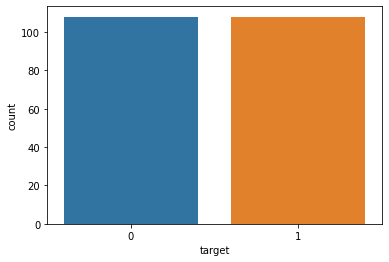

In [142]:
sns.countplot(X_reduce['target'])

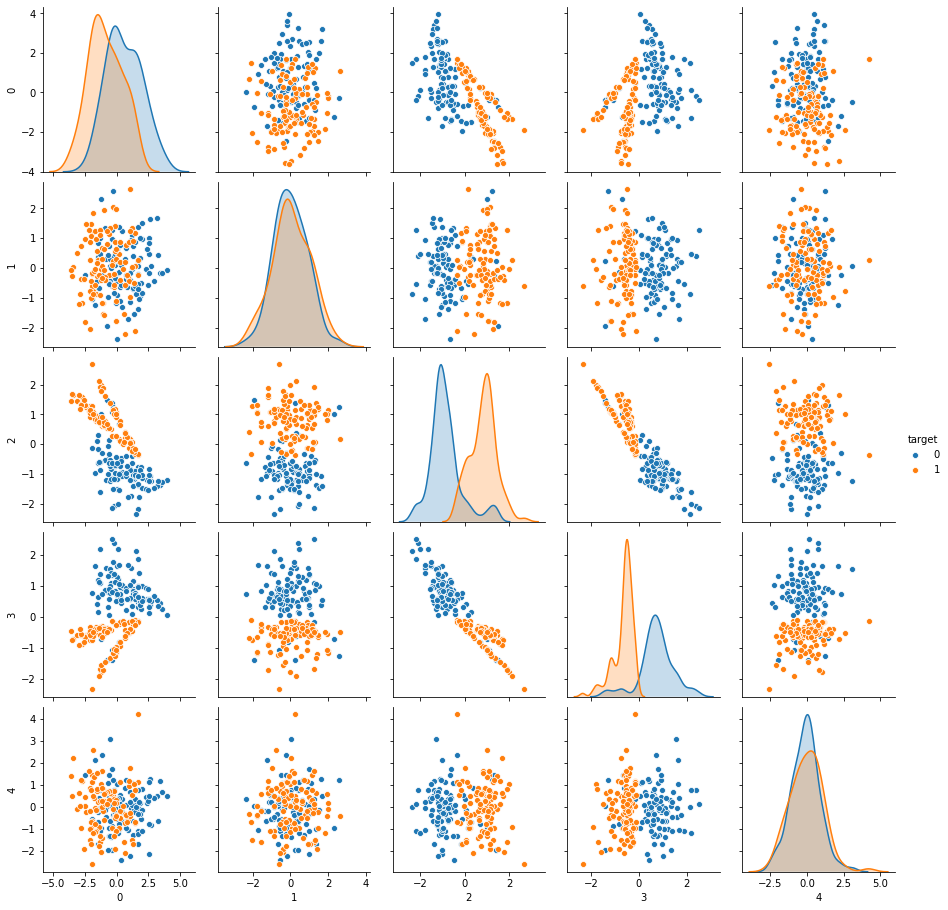

In [143]:
sns.pairplot(X_reduce, hue="target")

In [144]:
X_reduce

,0,1,2,3,4,target
0,0.055679,-0.910286,-0.638971,0.686207,-0.569231,0
1,3.422508,-0.179271,-1.370875,0.425147,1.186660,0
2,-1.465259,-0.680485,-0.159787,0.640502,-1.712245,0
3,1.681358,-1.375926,-0.753537,0.297065,-0.201575,0
4,1.200989,1.108248,-0.416583,0.078171,1.069723,0
...,...,...,...,...,...,...
211,-2.087231,0.855479,1.032329,-0.475506,-0.212535,1
212,-2.084650,0.263320,1.142195,-0.597347,-1.014249,1
213,-0.735558,1.232172,0.672401,-0.507510,0.098946,1
214,-1.845777,1.824131,0.998231,-0.514486,-1.184373,1


<b> Nos données sont maintenant équilibré </b>

## Implémentons un modèle.

In [145]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

###  Avec les données Augmentées

In [165]:
data_Tra, data_Tea, target_Tra, target_Tea = train_test_split(X_aug.iloc[:,:5], X_aug.target
                                 , random_state=0
                                 , train_size=0.75)

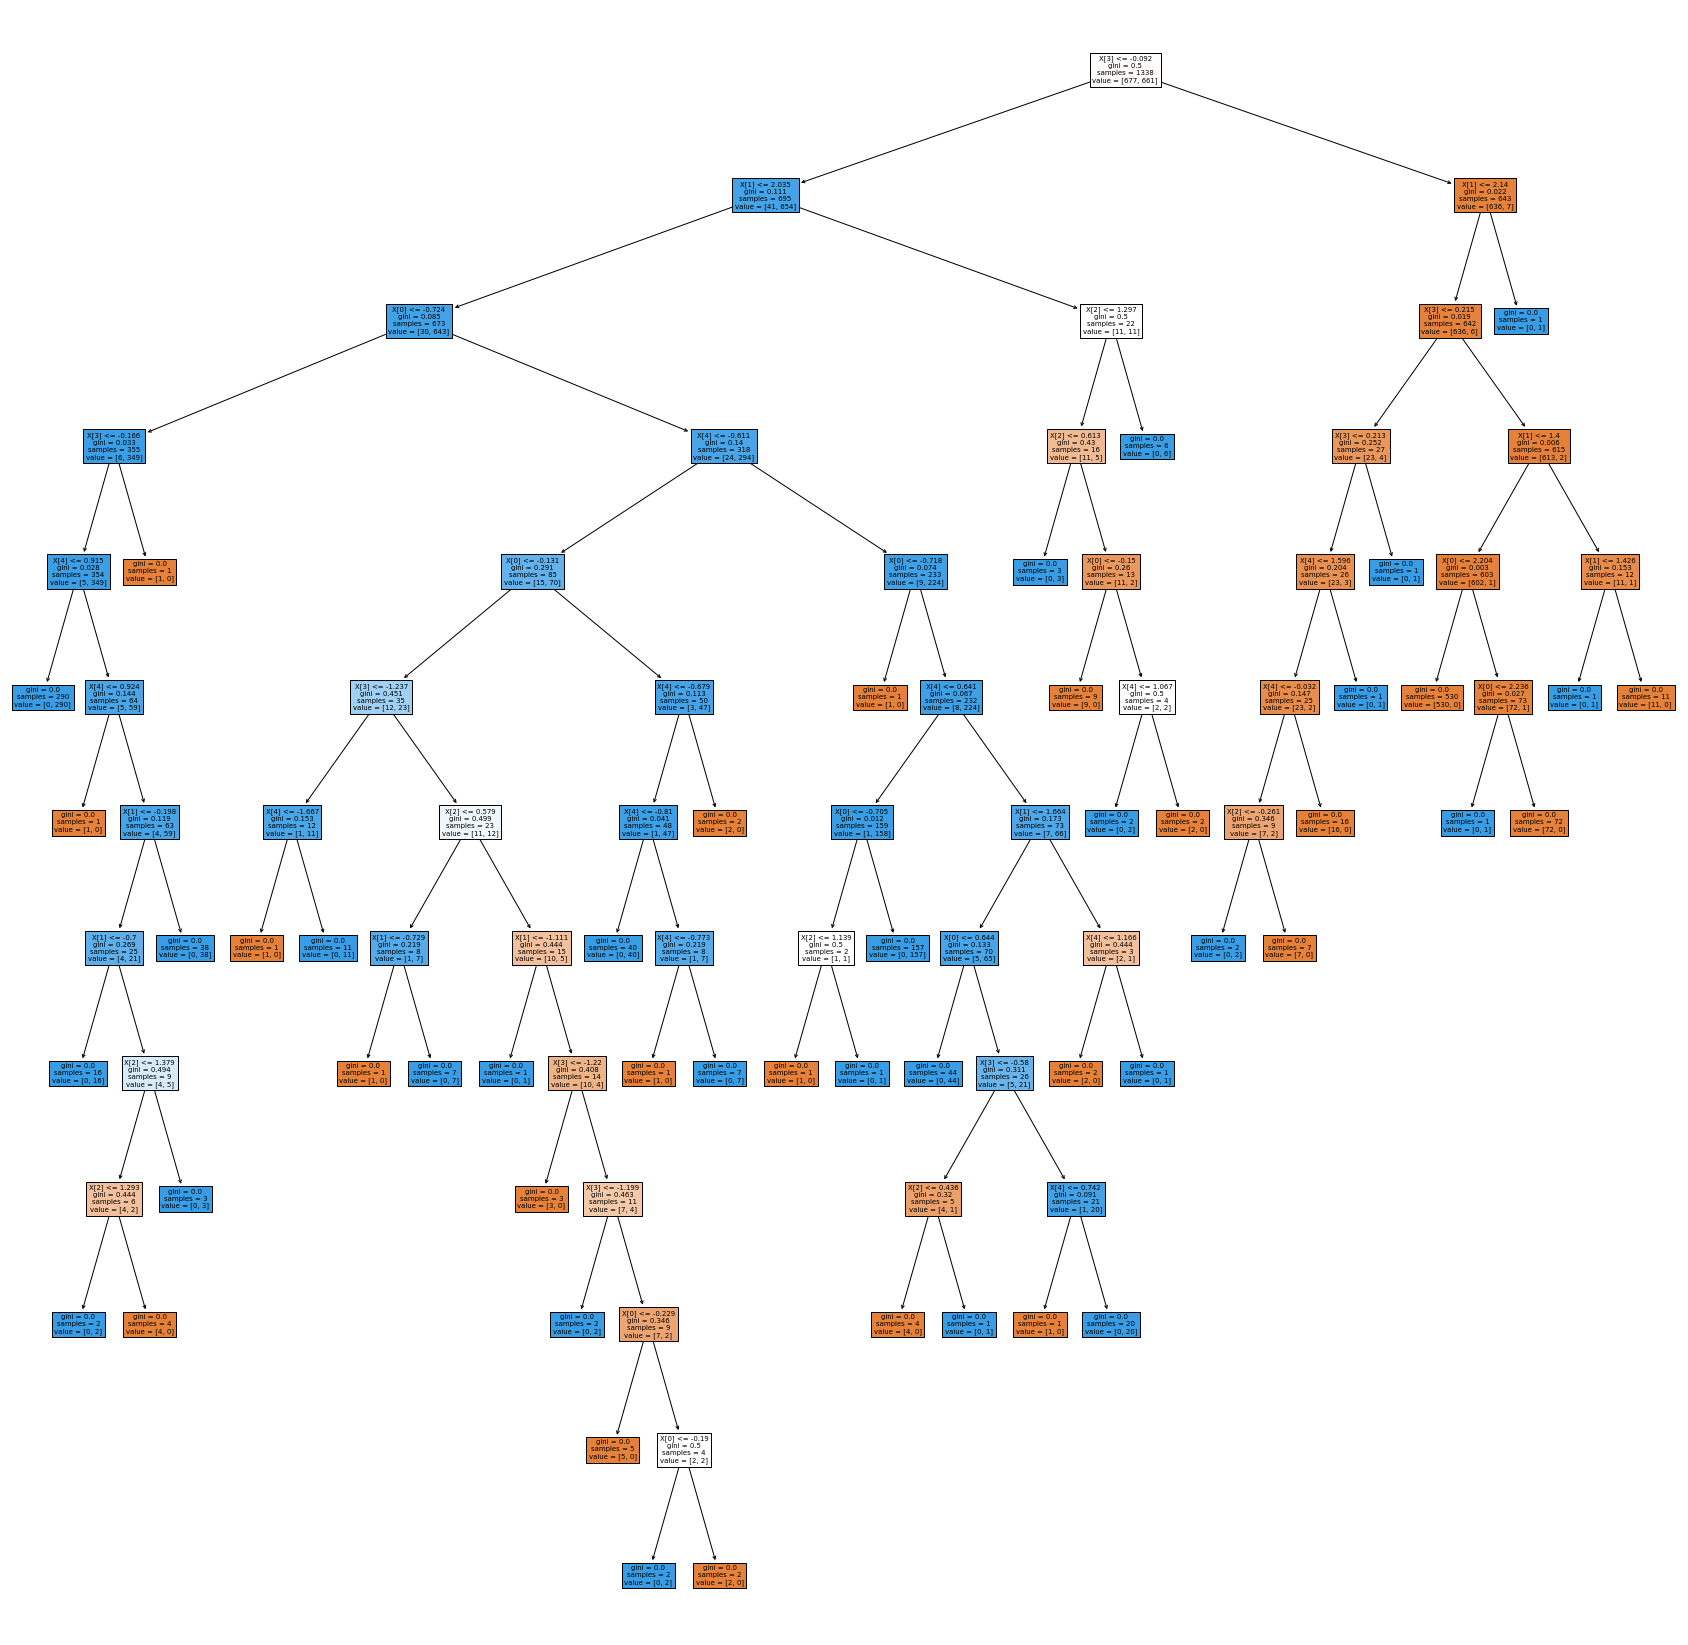

In [167]:
plt.figure(figsize=(30,30))
clfa = DecisionTreeClassifier()
clfa.fit(data_Tra,target_Tra)
plot_tree(clfa, filled=True)
plt.show()

In [168]:
resulta=clf.predict(data_Tea)

In [169]:
accuracy=accuracy_score(resulta, target_Tea)
recall= recall_score(resulta, target_Tea, average=None)
precision= precision_score(resulta, target_Tea, average=None)
F1= f1_score(resulta, target_Tea, average=None)
#100 % avec 80 / 20 j'ai testé 50 / 50 pour tester j'obtiens 0.93

print("R =", recall) # précision de prédiction des valeur Positive correctement prédit
#par rapport à l'ensemble des vrais valeurs
print("A =", accuracy) # Précision sur l'ensemble des bon résultat (True positive and True neg) par rapport
#A l'ensmble des valeurs.
print("P =", precision)# Précision de prédiction des valeurs Positive par rapport à tout les donnée prédite 
#postif. 
print('F1 =', F1) #Valeur qui fait la balance entre recall et precision pour avoir une valeur qui maximise les 
#deux valeurs

R = [0.99009901 0.93852459]
A = 0.9618834080717489
P = [0.93023256 0.99134199]
F1 = [0.95923261 0.96421053]


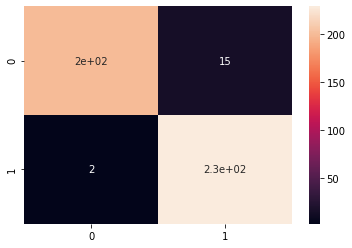

In [171]:
conf= confusion_matrix(target_Tea, resulta)
sns.heatmap(conf,annot=True)

### Avec les données réduites.

In [ ]:
data_Tr, data_Te, target_Tr, target_Te = train_test_split(X_reduce.iloc[:,:5], X_reduce.target
                                 , random_state=0
                                 , train_size=0.75)

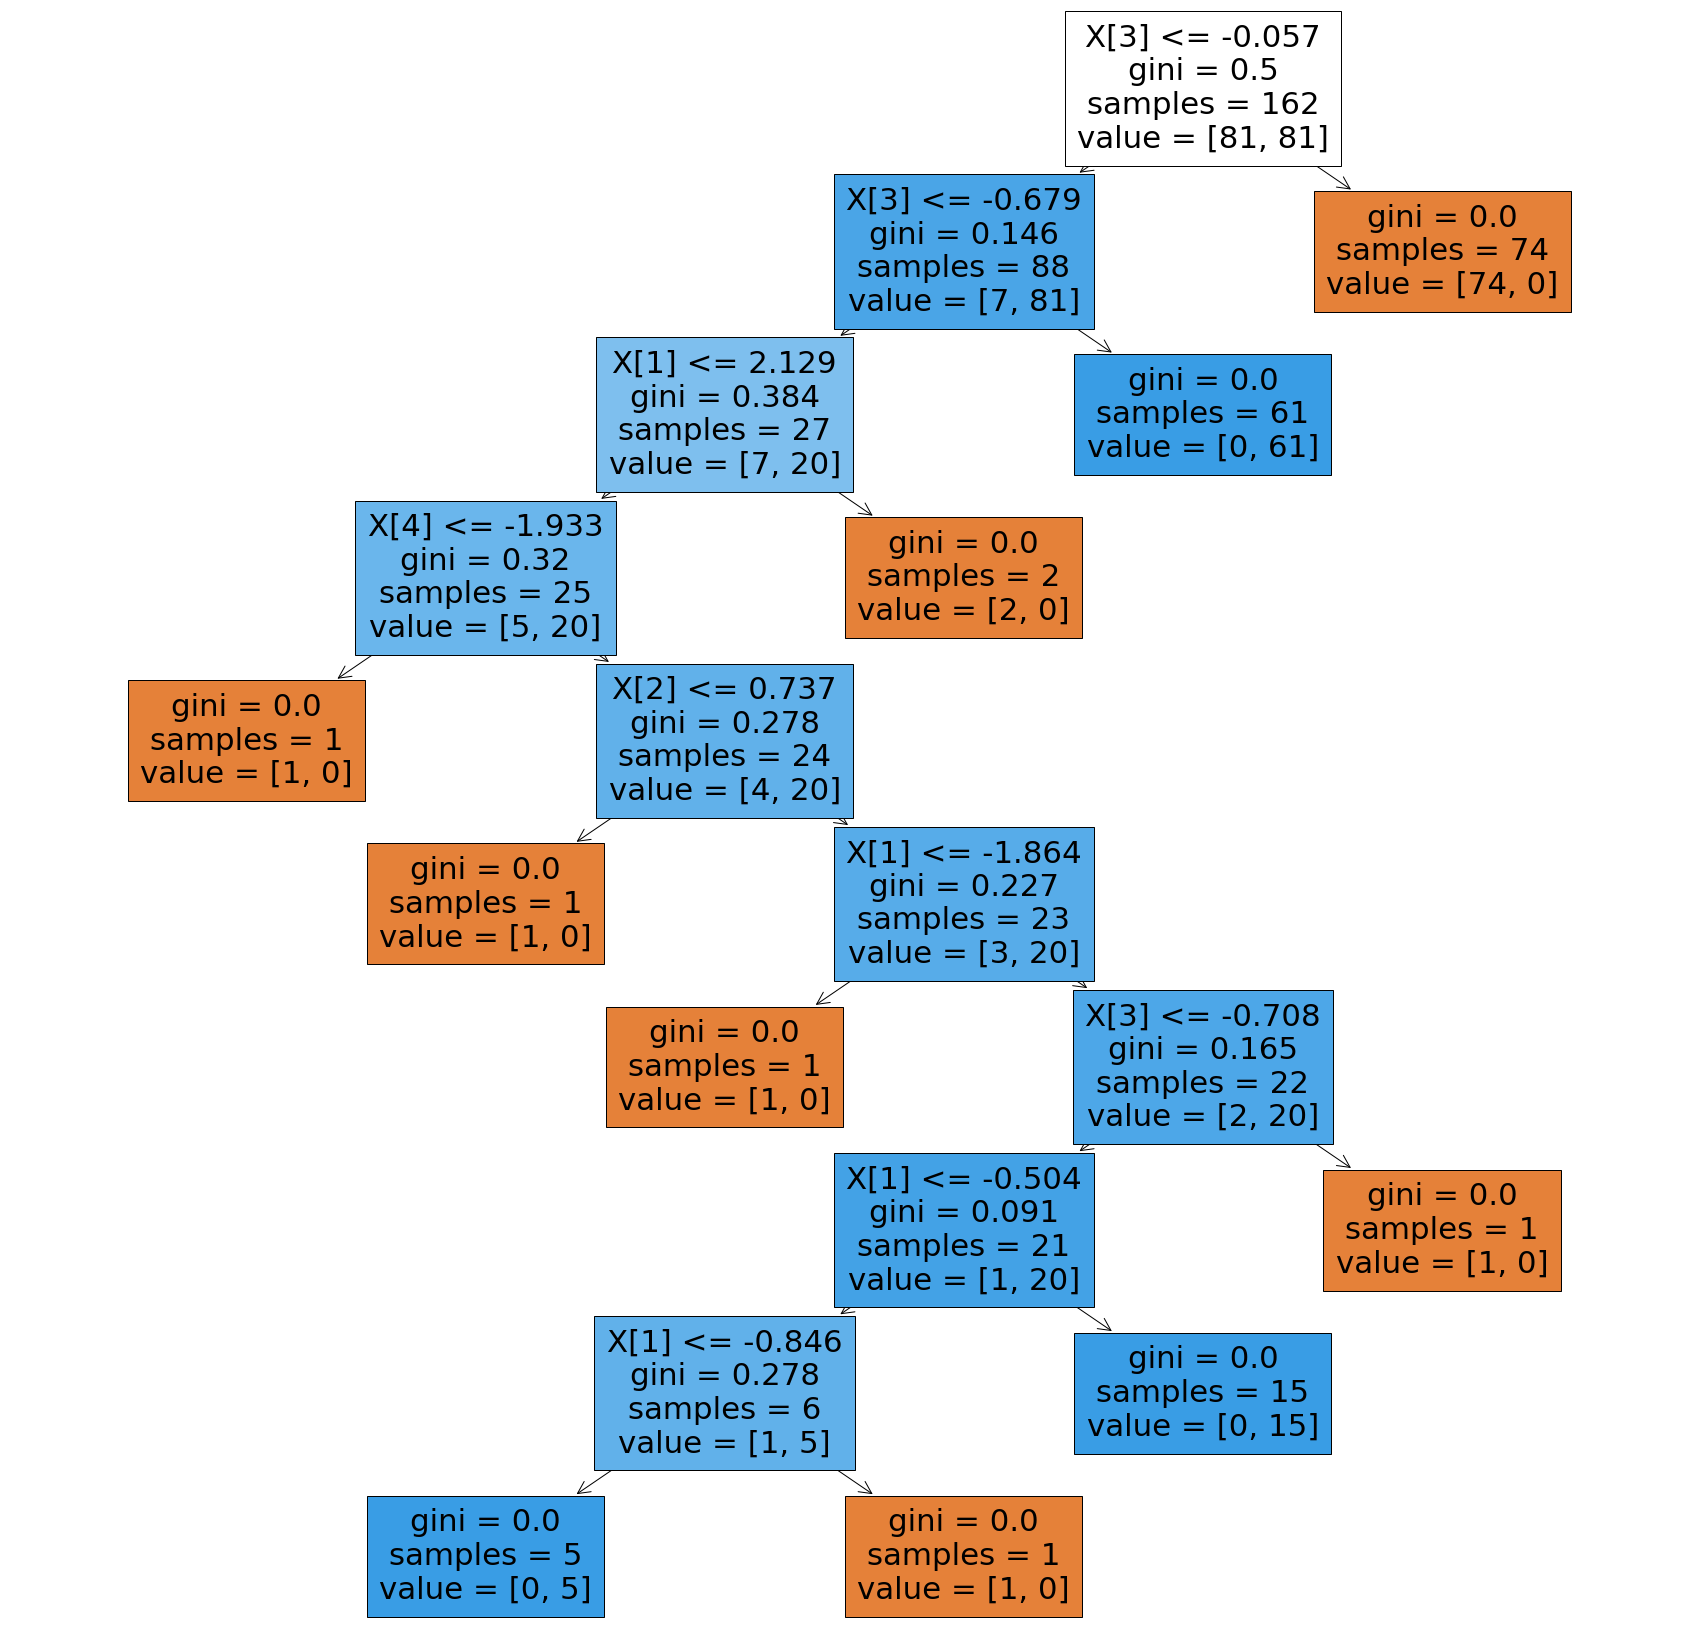

In [146]:
plt.figure(figsize=(30,30))
clf = DecisionTreeClassifier()
clf.fit(data_Tr,target_Tr)
plot_tree(clf, filled=True)
plt.show()

In [147]:
result=clf.predict(data_Te)

In [148]:
accuracy=accuracy_score(result, target_Te)
recall= recall_score(result, target_Te, average=None)
precision= precision_score(result, target_Te, average=None)
F1= f1_score(result, target_Te, average=None)
#100 % avec 80 / 20 j'ai testé 50 / 50 pour tester j'obtiens 0.93

print("R =", recall) # précision de prédiction des valeur Positive correctement prédit
#par rapport à l'ensemble des vrais valeurs
print("A =", accuracy) # Précision sur l'ensemble des bon résultat (True positive and True neg) par rapport
#A l'ensmble des valeurs.
print("P =", precision)# Précision de prédiction des valeurs Positive par rapport à tout les donnée prédite 
#postif. 
print('F1 =', F1) #Valeur qui fait la balance entre recall et precision pour avoir une valeur qui maximise les 
#deux valeurs

R = [0.80645161 0.91304348]
A = 0.8518518518518519
P = [0.92592593 0.77777778]
F1 = [0.86206897 0.84      ]


In [149]:
conf= confusion_matrix(target_Te, result)
conf

array([[25,  2],
       [ 6, 21]], dtype=int64)

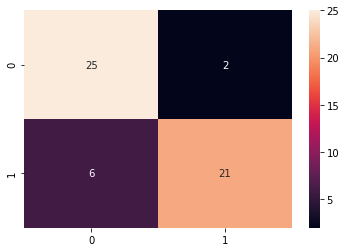

In [150]:
import seaborn as sns
sns.heatmap(conf, annot=True)

### Avec les données déséquilibrées

In [151]:
data_Tri, data_Tei, target_Tri, target_Tei = train_test_split(rc.iloc[:,:5], rc.target
                                 , random_state=0
                                 , train_size=0.75)

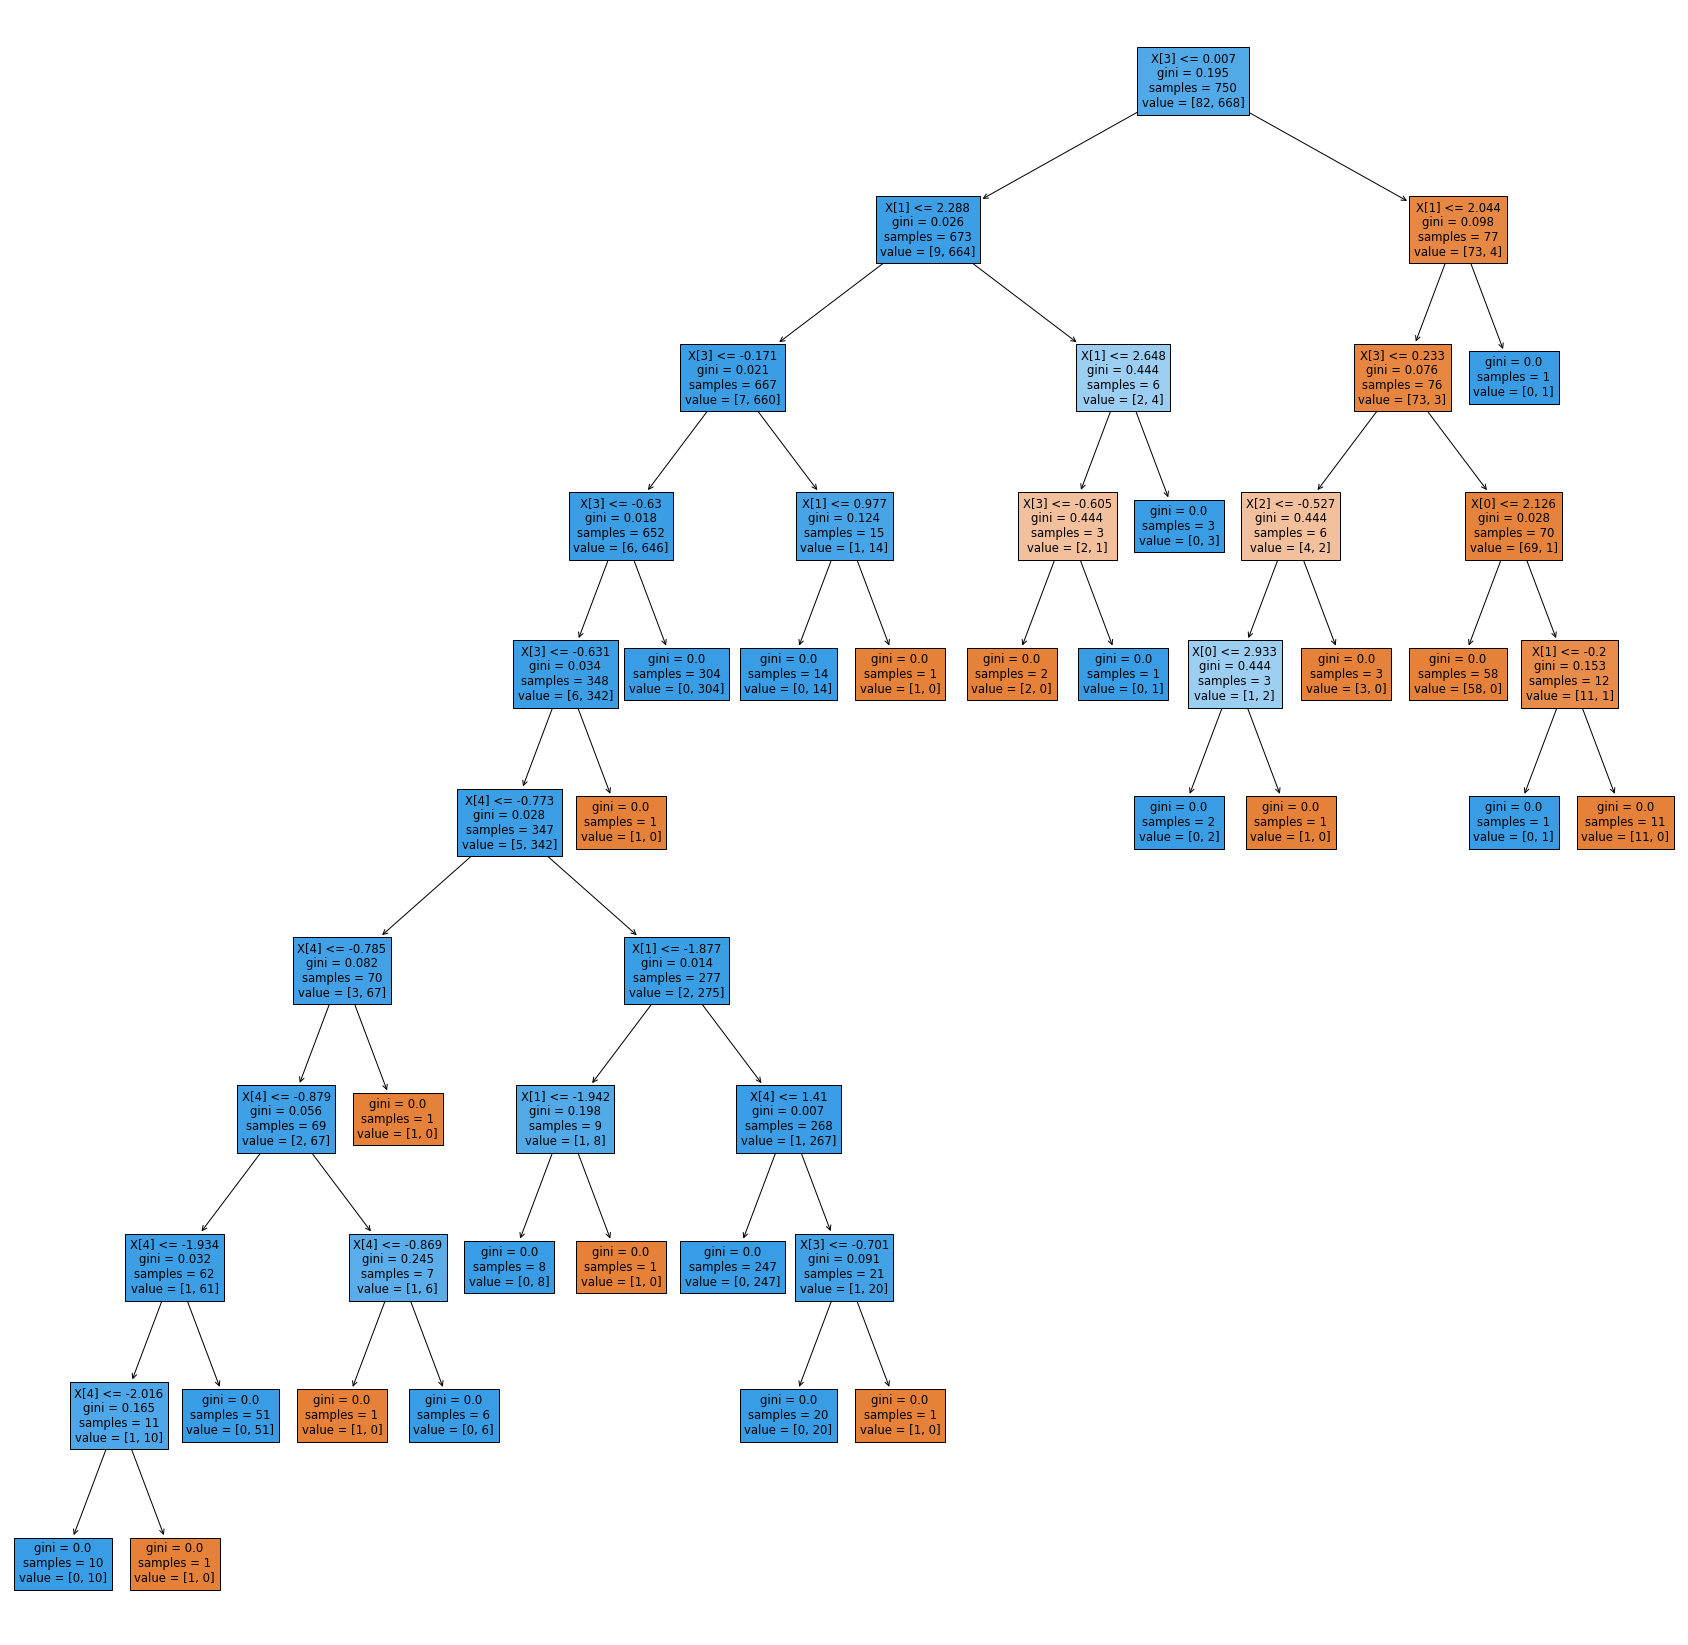

In [152]:
plt.figure(figsize=(30,30))
clf = DecisionTreeClassifier()
clf.fit(data_Tri,target_Tri)
plot_tree(clf, filled=True)
plt.show()

In [153]:
result=clf.predict(data_Tei)

In [154]:
#On calcul la précision(Accuracy ) avec un score en %
accuracy=accuracy_score(result, target_Tei)
recall= recall_score(result, target_Tei, average=None)
precision= precision_score(result, target_Tei, average=None)
F1= f1_score(result, target_Tei, average=None)
#100 % avec 80 / 20 j'ai testé 50 / 50 pour tester j'obtiens 0.93

print("R =", recall) # précision de prédiction des valeur Positive correctement prédit
#par rapport à l'ensemble des vrais valeurs
print("A =", accuracy) # Précision sur l'ensemble des bon résultat (True positive and True neg) par rapport
#A l'ensmble des valeurs.
print("P =", precision)# Précision de prédiction des valeurs Positive par rapport à tout les donnée prédite 
#postif. 
print('F1 =', F1) #Valeur qui fait la balance entre recall et precision pour avoir une valeur qui maximise les 
#deux valeurs

R = [0.79310345 0.98642534]
A = 0.964
P = [0.88461538 0.97321429]
F1 = [0.83636364 0.97977528]


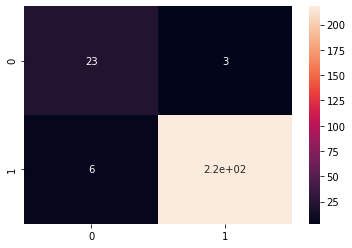

In [155]:
conf= confusion_matrix(target_Tei, result)
conf
sns.heatmap(conf, annot=True)